In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)

In [3]:
w = tf.Variable(2.0)
b = tf.Variable(0.7)

x = 1.5
y = w*x +b 

print('y : ', y)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
y :  tf.Tensor(3.7, shape=(), dtype=float32)


In [4]:
type(y)

tensorflow.python.framework.ops.EagerTensor

In [5]:
if y == 3.7:
    print('Right')

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
Right


# Window 11에서 GPU 사용
- Tensorflow 2.10. << Windows를 지원하는 마지막 버전이다. 
- CUDA 11.2
- CuDNN 8.1.1 << 상위의 호환 버전도 있는 것 같지만 트러블슈팅 과정에서 다운그레이드해서 확인하지 못했다.
- (중요) python 3.8.
    - 문서에서 3.10.도 지원하는 것으로 보여 CUDA랑 CuDNN, 환경변수만 붙잡고 한참 씨름했는데 마지막에 3.8.인 환경에서 시도했더니 한번에 인식되었다.. 

## 방법
1. CUDA 11.2. 설치
2. CUDA에 호환되는 CuDNN을 다운로드 (.zip 으로 받아진다) (회원가입 필요)
3. CuDNN 압축을 풀고 bin, include, lib을 각각 `C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2` 에 붙여넣어준다.
4. 환경변수에 `C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\bin`가 있는지 확인한다. (없다면 추가)
5. Tensorflow를 사용할 가상환경을 만들어준다. (pyrhon 3.8.)
`conda create -n tf_gpu python=3.8`
6. Tensorflow 2.10.을 설치한다. (conda나 pip 이용)
```
conda activate tf_gpu
pip install tensorflow==2.10
```

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # 모든 로그 표시
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [7]:
import tensorflow as tf

# GPU 장치 목록 확인
gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)


Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
import sys
print(sys.executable)

c:\Users\Caelu\anaconda3\envs\tf_gpu\python.exe


In [9]:
!echo %PATH%


c:\Users\Caelu\anaconda3\envs\tf_gpu;C:\Users\Caelu\anaconda3\envs\tf_gpu;C:\Users\Caelu\anaconda3\envs\tf_gpu\Library\mingw-w64\bin;C:\Users\Caelu\anaconda3\envs\tf_gpu\Library\usr\bin;C:\Users\Caelu\anaconda3\envs\tf_gpu\Library\bin;C:\Users\Caelu\anaconda3\envs\tf_gpu\Scripts;C:\Users\Caelu\anaconda3\envs\tf_gpu\bin;C:\Users\Caelu\anaconda3\condabin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\libnvvp;.;C:\Users\Caelu\AppData\Local\Programs\Python\Python311\Scripts;C:\Users\Caelu\AppData\Local\Programs\Python\Python311;C:\Program Files (x86)\VMware\VMware Player\bin;D:\app\Caelu\product\11.2.0\dbhome_1\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;D:\openjdk\jdk-22.0.1\bin;D:\Program Files\nodejs;C:\ProgramData\chocolatey\bin;D:\Program Files\Git\cmd;C:\Program Files\Docker

In [10]:
!nvcc --version  # CUDA 버전 확인

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_22:08:44_Pacific_Standard_Time_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [11]:
!nvidia-smi

Sun Sep  1 20:54:20 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   41C    P0             14W /   35W |    1835MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
!python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8846501419960399064
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1733715559
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15040097570301498048
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


# Tensorflow를 이용한 회귀모델

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # 0: 모든 로그, 1: 경고 로그, 2: 오류 로그


In [2]:
import tensorflow as tf
import numpy as np

x = tf.constant([1,2,3,4,5,6,7,8,9,10], dtype=tf.float32)
y = tf.constant([3,5,5,6,7,7,8,9,9,10], dtype=tf.float32)

w = tf.Variable(tf.random.normal(shape=[1]))
b = tf.Variable(tf.random.normal(shape=[1]))

def compute_loss():
    y_pred = w*x + b
    loss = tf.reduce_mean((y-y_pred)**2)
    return loss

- 선형식 하나에 필요한 가중치, 편향은 0차원이므로 shape는 [0] 이다.
- reduce_mean : 텐서 요소들의 평균. 차원을 고려하지 않은 모든 원소의 평균이다.


In [4]:
optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w,b])
    
    if i%100 == 0:
        print(f'{i} loss : {compute_loss().numpy()}\n')
    
print(f'final w: {w}')
print(f'final b: {b}')


0 loss : 0.14543452858924866

100 loss : 0.14181946218013763

200 loss : 0.14181819558143616

300 loss : 0.14181816577911377

400 loss : 0.14181816577911377

500 loss : 0.14181819558143616

600 loss : 0.14181819558143616

700 loss : 0.14181819558143616

800 loss : 0.14181819558143616

900 loss : 0.141818106174469

final w: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.7090909], dtype=float32)>
final b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>


optimizer.minimize는 loss를 줄이는 방향으로 var_list의 최적값을 찾는다.


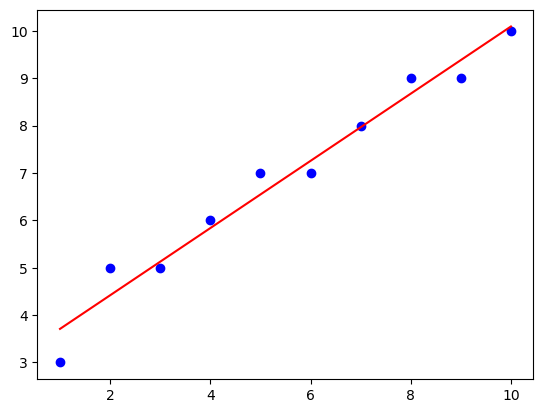

In [5]:
import matplotlib.pyplot as plt
plt. plot(x, y, 'bo')
plt.plot(x,w*x + b, 'red')
plt.show()

In [8]:
import tensorflow as tf
import numpy as np

x = tf.constant([1,2,3,4,5,6,7,8,9,10], dtype=tf.float32)
y = tf.constant([3,5,5,6,7,7,8,9,9,10], dtype=tf.float32)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(units=10,activation='tanh'))
model.add(tf.keras.layers.Dense(units=1))

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.07)
model.compile(loss='mse', optimizer=opt)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                20        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- 훈련데이터가 적어 학습률을 다소 높게 설정했다.
- compile() 메서드를 통해 loss, optimizer 등을 설정한다.

In [11]:
model.fit(x,y,epochs=1000,)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 69.5856
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 56.2582
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 45.2290
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 35.9691
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 27.8305
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 20.7608
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 14.9228
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 10.4903
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 7.3630
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 5.4241
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 4.3991
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.8841
Epoch 13/1000
1/1 [=======================

- .fit() 메서드는 모델을 학습시키는데 사용된다.
	- 입력, epochs, batch_size 등을 설정할 수 있다.
	- 훈련 데이터가 적기 때문에 많은 epochs를 수행했다.

In [12]:
model.predict(x)

1/1 [==============================] - 0s 91ms/step


array([[3.0057256],
       [4.8148427],
       [5.26921  ],
       [5.9716153],
       [6.7306204],
       [7.3626647],
       [7.9866247],
       [8.697941 ],
       [9.369042 ],
       [9.836769 ]], dtype=float32)

1/1 [==============================] - 0s 56ms/step


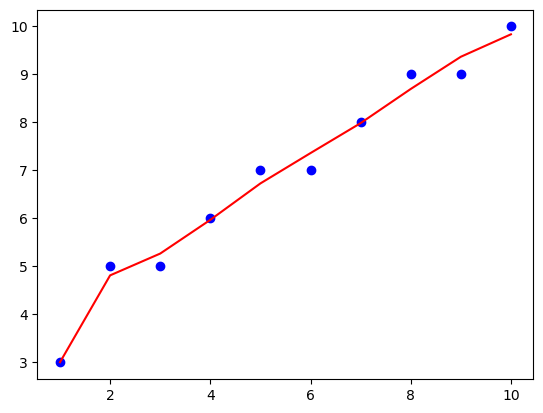

In [14]:
import matplotlib.pyplot as plt
plt.plot(x,y,'bo')
plt.plot(x,model.predict(x),'red')
plt.show()